# 1. Logistic Regression
- 연속적인 Label data가 아니라 이산적이 Label data면 어떻게 학습해야 할까?
- [http://kocw.net/home/cview.do?cid=42616b833b3ad083]
- [http://kocw.net/home/cview.do?cid=090542a172d8f61a]
- [https://wikidocs.net/22881]
- [https://danawalab.github.io/machinelearning/2022/12/01/MachineLearning-LogisticRegression.html]

## 1.0 binary classification
- 2개의 종류로 나뉘어진 데이터를 분류하는 문제입니다.
- 스팸메일인가 아닌가
- 정상품인가 불량품인가
- 0인가 1인가 

## 1.1 Logistic function

- Logistic regression을 진행하기 위해서는 출력 값을 0과 1의 값으로 변경해야 한다. 
- Score 를 0 과 1사이의 값으로 변경하기 위해 `Sigmoid(logistic) function` 을 사용

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

- Logistic regression을 진행할 때 입력 데이터를 $x$, 실제 class 값을 $y$, 예측된 출력 값을 $\hat{y}$라고 하면 $x$는 두가지 변환을 거쳐서 $\hat{y}$가 됩니다. 
$$z = wx + b$$
$$\hat{y} = \sigma(z)$$

### Goal
- $\hat{y}$가 실제 $y$와 가장 가깝게 되도록 하는 $w$와 $b$를 찾는 것 

In [13]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline

In [14]:
z = sympy.Symbol('z', real=True)

logistic = 1/(1+ sympy.exp(-z))
logistic

1/(1 + exp(-z))

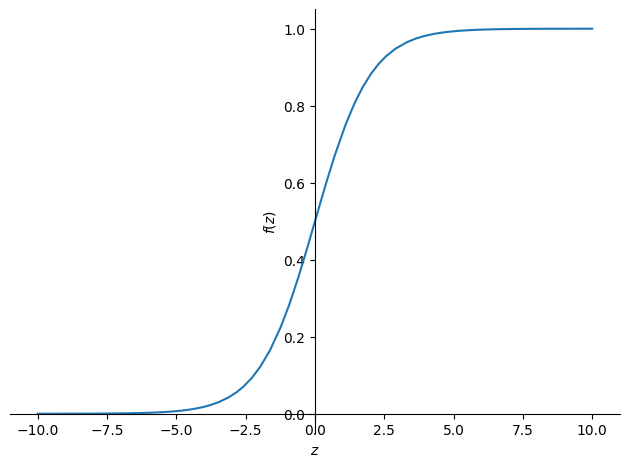

In [15]:
sympy.plotting.plot(logistic)

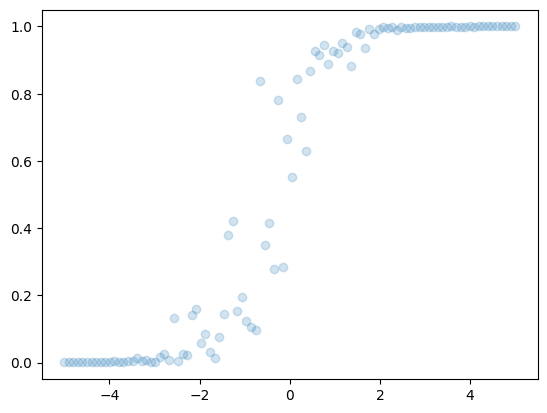

In [16]:
# nois 를 추가한 Data
x_data = numpy.linspace(-5, 5, 100)
w = 2
b = 1
numpy.random.seed(0)
z_data = w * x_data + b + numpy.random.normal(size=len(x_data)) # numpy.random.normal(size=len(x_data)) nois 추가
y_data = 1 / (1+ numpy.exp(-z_data)) #자연상수 z_data의 제곱 

pyplot.scatter(x_data, y_data, alpha=0.2)

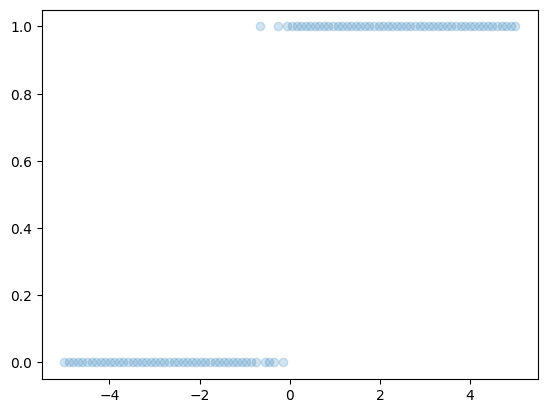

In [17]:
y_data = numpy.where(y_data >= 0.5, 1, 0) # 0.5를 기준으로 0.5 보다 크면 1, 작으면 0 이라고 하자
pyplot.scatter(x_data, y_data, alpha=0.2)

## 1.2 Logistic loss function
- Predict Data $\hat{y}$과 Label $y$가 가장 가깝게 되도록 하는 $w$와 $b$를 찾는것이 우리의 목표

### Cost Function
- Linear regression -> MSE 
- Logistic regression -> ?

- Logistic regression MSE 를 적용하면 convex 한 형태가 아니다. 

- linear regression에서의 MSE
$$\frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$


- logistic regression에서의 MSE
$$\frac{1}{n} \sum_{i=1}^n (y_i - \sigma(wx_i + b))^2$$

### 예
$w = 1, b=0$ , $(x, y) : (-1, 2), (-20, -1), (-5, 5)$ 일 때 cost function 그래프

In [18]:
badloss = (2 - 1/(1+ sympy.exp(-z)))**2 + \
          (-1 - 1/(1+ sympy.exp(-20*z)))**2  + \
          (5 - 1/(1+ sympy.exp(-5*z)))**2
badloss

(-1 - 1/(1 + exp(-20*z)))**2 + (2 - 1/(1 + exp(-z)))**2 + (5 - 1/(1 + exp(-5*z)))**2

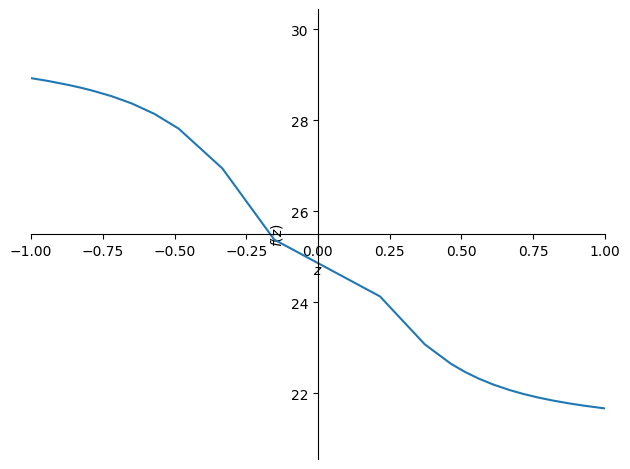

In [19]:
sympy.plotting.plot(badloss, xlim=(-1,1))

Gradient descent 방식으로 위 cost function의 최솟값을 구하게 되면 어떻게 될까? 
- 중간에 기울기가 0인 지점에서 멈추게 된다.(왜?)

# cost function $L$
- cross entropy function 을 사용함
- 이진분류 model에서의 cost function은 다음과 같은 함수를 사용한다. 
$$ L = -y \log(a) + (y-1)\log(1-a) $$

- 이제 실제로 차이가 클 때 $L$ 값도 커질까? 
- $y=1$인 경우 $L = -\log(a)$
- $a$ : 예측한값
- $f(a)$ : costfunction 의 값
- 정답 class 가 1인 경우 predict 값이 0에 가까워지면 costfunction의 값은 점점 커지고
- 정답 class 가 1인 경우 predict 값이 1에 가까워지면 costfunction의 값은 0에 가까워 진다. 

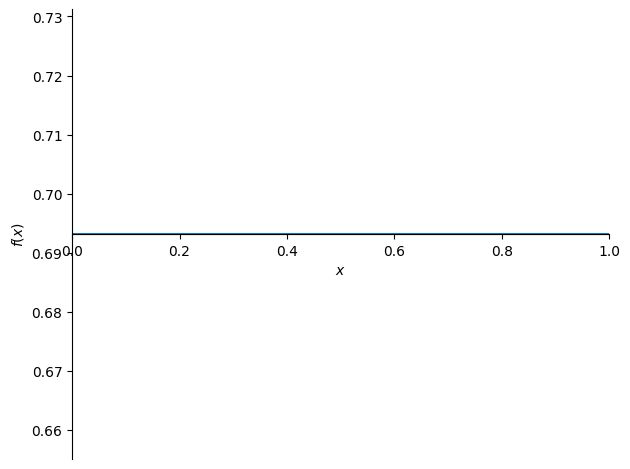

In [20]:
a = 0.5
sympy.plotting.plot(-sympy.log(a), xlim=(0,1))

Label class 가 1일 때 예측 값이 0에 가까워지면 cost function값이 커지고, 1에 가까워지면 cost function이 작아진다.

- $y=0$인 경우 $L = \log(1-a)$
- 정답 class 가 0인 경우 predict 값이 1에 가까워지면 costfunction의 값은 점점 커지고
- 정답 class 가 0인 경우 predict 값이 0에 가까워지면 costfunction의 값은 0에 가까워 진다. 

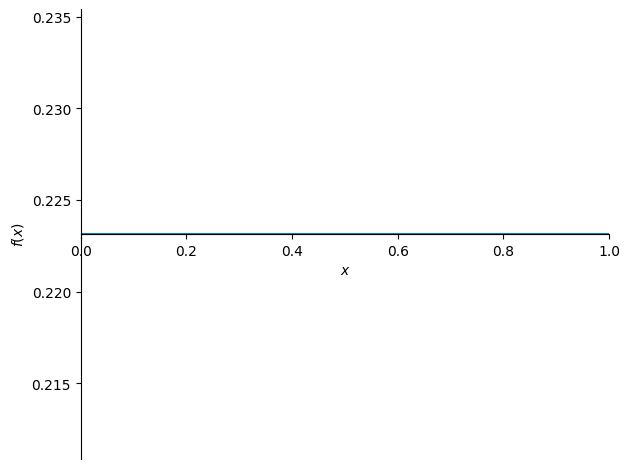

In [21]:
a = 0.2
sympy.plotting.plot(-sympy.log(1-a), xlim=(0,1))

Predict 값이 label값과 가까워지면 cost function값이 작아지고 멀어지면 커지게 된다.

## 1.3 autograd function을 이용해 최적의 parameters 를 찾아보자 
- logistic regression의 전체적인 과정 구현
- Goal : GD 방식을 이용해 w와 b의 최적값을 찾아 내자

In [23]:
logistic

1/(1 + exp(-z))

In [24]:
w, b, x, y = sympy.symbols('w b x y')
logistic = 1/(1+ sympy.exp(-w*x-b)) # 학습할수 있는 형태로 재정의
logistic

1/(exp(-b - w*x) + 1)

In [25]:
Loss = -y*sympy.log(logistic) - (1-y)*sympy.log(1-logistic)
Loss

-y*log(1/(exp(-b - w*x) + 1)) - (1 - y)*log(1 - 1/(exp(-b - w*x) + 1))

In [26]:
# import the autograd-wrapped version of numpy
from autograd import numpy
# import the gradient calculator
from autograd import grad 

In [27]:
def logistic(z):
    '''The logistic function'''
    return 1 / (1 + numpy.exp(-z))
    
def logistic_model(params, x):
    '''A prediction model based on the logistic function composed with wx+b
    Arguments:
       params: array(w,b) of model parameters
       x :  array of x data'''
    w = params[0]
    b = params[1]
    z = w * x + b
    y = logistic(z)
    return y

def log_loss(params, model, x, y):
    '''The logistic loss function
    Arguments:
       params: array(w,b) of model parameters
       model:  the Python function for the logistic model
       x, y:   arrays of input data to the model'''
    y_pred = model(params, x)
    return -numpy.mean(y * numpy.log(y_pred) + (1-y) * numpy.log(1 - y_pred))

In [28]:
# get a function to compute the gradient of the logistic loss
gradient = grad(log_loss)

In [29]:
type(gradient)

function

- grad 함수는 변수 개수만큼 output을 생성한다. 
- $w, b$ 2개의 변수가 있습니다. -> 2개의 output

In [30]:
# 랜덤으로 초기화한 변수를 넣어서 기울기값를 계산해 보자. 
numpy.random.seed(0)
params = numpy.random.rand(2)
# [w, b]
print(params)

[0.5488135  0.71518937]


In [31]:
# 이렇게 2개의 변수에 대해서 각각 기울기 값을 반환해줍니다. 
# [w, b]
gradient(params, logistic_model, x_data, y_data)

array([-0.42734877,  0.08274066])

- 기울기 값이 0에 가까워지면 더이상 반복을 하지 않는 조건을 추가

Optimized value of w is 2.73095033006471 vs. true value: 2
Optimized value of b is 0.6974552315981599 vs. true value: 1
Exited after 5000 iterations


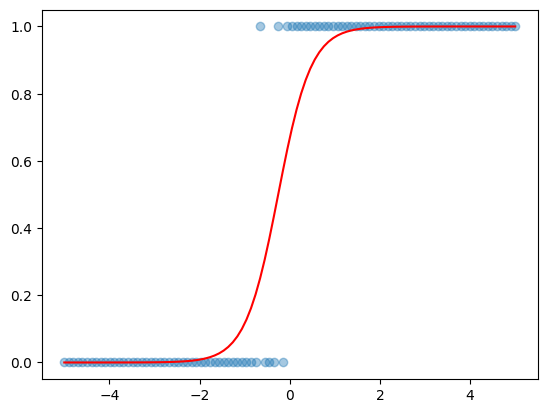

In [32]:
max_iter = 5000
i = 0
descent = numpy.ones(len(params))

while numpy.linalg.norm(descent) > 0.001 and i < max_iter:

    descent = gradient(params, logistic_model, x_data, y_data)
    params = params - descent * 0.01
    i += 1


print('Optimized value of w is {} vs. true value: 2'.format(params[0]))
print('Optimized value of b is {} vs. true value: 1'.format(params[1]))
print('Exited after {} iterations'.format(i))


pyplot.scatter(x_data, y_data, alpha=0.4)
pyplot.plot(x_data, logistic_model(params, x_data), '-r');

빨간색 곡선이 우리의 모델입니다. 

이제 기준값을 정하고 그것보다 크면 1, 작으면 0으로 분류를 하면 됩니다. 

이번에는 0.5로 설정해서 진행하겠습니다. 

In [33]:
def decision_boundary(y):
    return 1 if y >= .5 else 0

모든 점을 함수에 넣어야 하는데 하나씩 넣으면 반복문을 돌아야해서 오래걸리기 때문에 numpy의 vectorize 함수를 사용하겠습니다. 

In [34]:
decision_boundary = numpy.vectorize(decision_boundary)

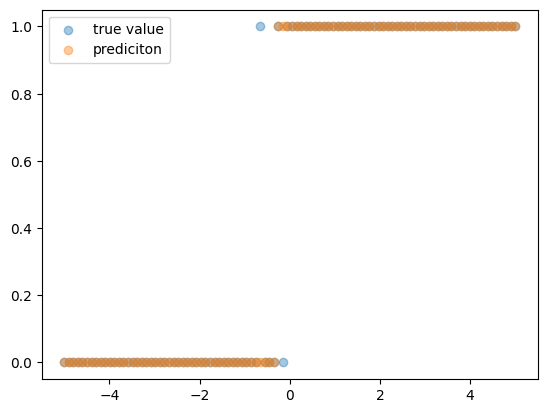

In [35]:
def classify(predictions):
    '''
    Argument:
    predictions, an array of values between 0 and 1
    
    Returns: 
    classified, an array of 0 and 1 values'''

    return decision_boundary(predictions).flatten()

pyplot.scatter(x_data, y_data, alpha=0.4,
               label='true value')
pyplot.scatter(x_data, classify(logistic_model(params, x_data)), alpha=0.4, 
               label='prediciton')

pyplot.legend();

# 로지스틱 회귀 (Logistic Regression)
- 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델 
- 로지스틱 회귀는 예측 함수 정의 
\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

\begin{equation}
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [6]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
plt.style.use(['seaborn-whitegrid'])

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [8]:
# Sample data 를 이용해 Classification 을 진행해보자. 
samples = 1000
x, y = make_classification(n_samples=samples, n_features=2, #분류될 클래스가 몇개인지 나타냄 이진이면 2
                           n_informative=2, # 독립변수 중 종속변수와 상관관계가 있는 성분의 수 (x와 y)
                           n_redundant=0, # 노이즈 개수
                           n_clusters_per_class=1) # 클래스당 클러스터의 개수 예) class 0 는 2개의 cluster로 분리된다

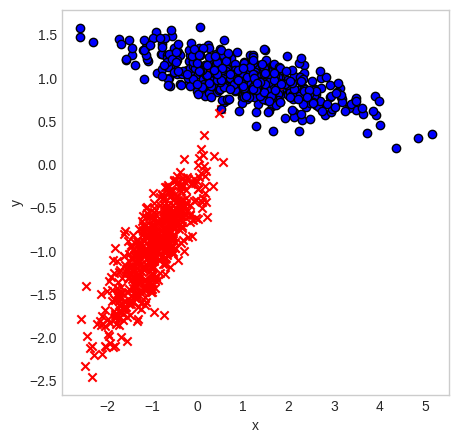

In [10]:
fig, ax = plt.subplots(1, 1 , figsize = (5,5))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0: # y(target)가 0일때  x마커 r
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'x', color = 'r')
  else: # y(target)가 1일때 o마커 b 
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'o', color = 'b')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
print(f'Train Data Score : {model.score(x_train, y_train)}')
print(f'Test Data Score : {model.score(x_test, y_test)}')

Train Data Score : 0.9925
Test Data Score : 1.0


In [14]:
# model의 정확도 평가 
scores = cross_val_score(model, x, y, cv = 10, scoring = 'accuracy') # accur 제대로 분류가 됐는지 측정

print(f'CV mean score: {scores.mean()}') 

CV mean score: 0.994


In [15]:
model.intercept_, model.coef_ # w0+w1a+w2b 시그모이드에 들어갈 가중치를 의미 시그모이드에
                              #  가기전엔 스코어를 의미 

(array([-1.72649999]), array([[1.0157514 , 4.89939849]]))

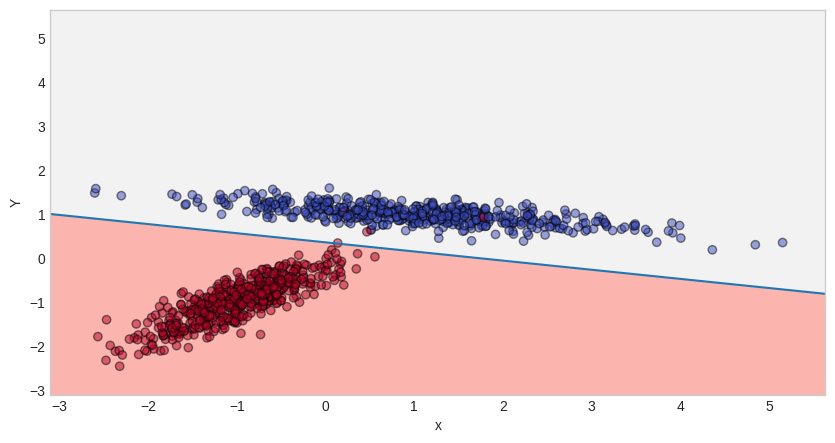

In [16]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5 
y_min, y_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # 격자 데이터 생성
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel(): 다차원을 1차원으로 해체

# Test data를 용한 분류 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1) # 0과 1을 나눠주는 배경색 

#train data를 plot에 출력
plt.scatter(x[:, 0], x[:, 1], c=np.abs(y -1), edgecolors='k', alpha = .5, cmap=plt.cm.coolwarm)
plt.xlabel('x')
plt.ylabel('Y')
#산점도와 그래프를 축에 맞게 고정시킨다. 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

# 분류 직선 
w_0 = model.intercept_[0] #bias
w_1 = model.coef_[0][0] #w_1 w_2
w_2 = model.coef_[0][1] #w_1 w_2
x_lin = np.linspace(x_min, x_max)
y_lin = -(w_1/w_2)*x_lin  - (w_0/w_2)
# 0과 1을 나눠주는 빗금선생성 
plt.plot(x_lin, y_lin)
#
plt.show()

## 붓꽃 데이터

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [32]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [33]:
# 학습시켜야 하는 target data
# 0, 1 , 2 분류만 잘하면 된다.
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
# [0,1,2] -> ['setosa', 'versicolor', 'virginica'] 로 변경 
# pairplot 과 같은 차트를 통해 feature의 관계를 확인하기 위해서 
species = pd.Series((iris.target) , dtype = 'category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
iris_df.describe()
# 통계량 확인 및 이상치 확인

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Box plot 
- Median : 데이터의 중앙값
- 1사 분위(Q1) : Median을 기준으로 하위 25% 지점 
- 3사 분위(Q3) : Median을 기준으로 상위 25% 지점 
- interquartile range (IQR)(상자길이): Q3 - Q1
- Lower and upper 1.5*IQR whiskers(수염)
- Outliers(이상점) : Q1 - 1.5 IQR 또는 Q3 - 1.5 IQR 밖에 위치하는 데이터
- Upper는 Q3 
      (Q1 + 1.5 *IQR)                          (Q3 + 1.5 *IQR)
    Lower 1.5*IQR whisker                  Upper 1.5*IQR whisker 
        |          ----------------             |
        |          Q1             Q3            |
--------||----------|--------------|----------|-|---------
outliers|                     |                 |
      Minimun value         Median       Maximum value

<AxesSubplot: >

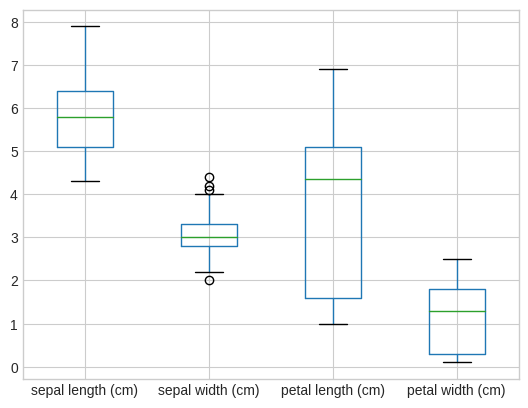

In [37]:
iris_df.boxplot()

<AxesSubplot: >

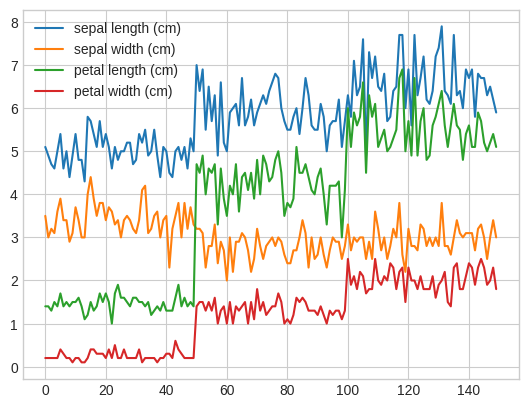

In [38]:
iris_df.plot()

In [ ]:
import seaborn as sns

sns.pairplot(iris_df, hue='species')

### 붓꽃 데이터에 대한 로지스틱 회귀


In [41]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2,3]], iris.target,
                                                    test_size=0.2, random_state=1, stratify=iris.target)
# stratify : stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)를 train/ test 유지 
# 한쪽에 몰리는것을 방지시켜준다. 

In [44]:
iris.data.shape
iris.data[:, [2,3]].shape

(150, 2)

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', # 최적화에 사용할 알고리즘 설정
                           multi_class='auto', 
                           C=100, # 규칙의 강도의 역수 값(높은 C를 설정할수록, 낮은 강도의 제약조건, 강한 규제)
                           random_state=1)
model.fit(x_train, y_train)

# 옵션 값은 전부 외울수 없기에 한번씩 보고 지나간다 

LogisticRegression(C=100, random_state=1)

### solver
- optimization에 사용되는 algorithm의 종류. 
    - {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'} (default: 'lbfgs')
- 작은 dataset의 경우 'liblinear'이 좋은 선택일 수 있으며, 'sag'과 'saga'는 큰 dataset에서 더욱 빠르게 동작한다.
- Multiclass problem의 경우, 'newton-cg', 'sag', 'saga', 'lbfgs'만이 multinomial loss를 다룰 수 있다.
- 'liblinear'은 one-versus-rest scheme에서만 동작한다.
- 각 solver가 지원하는 penalty의 종류
    - 'newton-cg': 'l2', 'none'
    - 'lbfgs': 'l2', 'none'
    - 'liblinear': 'l1', 'l2'
    - 'sag': 'l2', 'none'
    - 'saga': 'elasticnet', 'l1', 'l2', 'none'

- l1 l2 elasticnet 정도의 옵션만 기억해두기 

In [46]:
print(f"학습 데이터 점수 : {model.score(x_train,y_train)}")
print(f"평가 데이터 점수 : {model.score(x_test,y_test)}")

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 0.9666666666666667


In [47]:
import numpy as np
x = np.vstack((x_train, x_test)) # vstack 배열을 세로로 결합할때 사용
y = np.hstack((y_train, y_test)) # hstack 배열을 가로로 결합할때 사용 

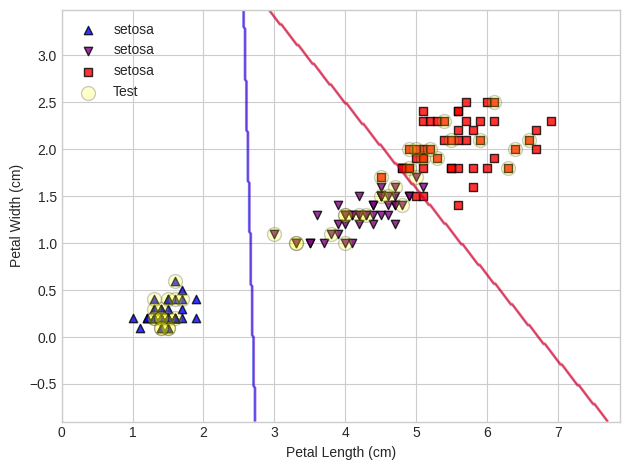

In [48]:
from matplotlib.colors import ListedColormap

# 격자를 이용한 분류 직선 표시 
x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02),
                       np.arange(x2_min, x2_max, .02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

specise = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contour(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

#실제 train dataset
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
              alpha = 0.8, c=colors[idx],
              marker=markers[idx], label=species[cl],
              edgecolor='k')
 # test Set  
x_comb_test, y_comb_test = x[range(105, 150), :], y[range(105, 150)]
plt.scatter(x_comb_test[:, 0], x_comb_test[:, 1],
            c='yellow', edgecolor = 'k', alpha=0.2,
            linewidth=1, marker='o', 
            s=100, label='Test')
  
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout();

In [59]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : [2, 2.2, 2.4, 2.6, 2.8]}] 

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring = 'accuracy', cv = 10, n_jobs = multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [2, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [60]:
result = gs.fit(iris.data, iris.target)

/mnt/c/Users/user/Desktop/python/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/c/Users/user/Desktop/python/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [51]:
print(gs.best_estimator_)
print('최적 점수: {}'.format(gs.best_score_))
print('최적 파라미터: {}'.format(gs.best_params_)) 
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000598,0.000160,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.029738,0.010028,0.000733,0.000323,2,l2,"{'C': 2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000688,0.000850,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.024787,0.005523,0.000538,0.000050,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000383,0.000089,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.025747,0.005260,0.000595,0.000125,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000335,0.000035,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,0.031262,0.010736,0.005576,0.014669,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000466,0.000166,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.036024,0.010169,0.000585,0.000055,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


### 실습 유방암 데이터 

In [52]:
from sklearn.datasets import load_breast_cancer

In [53]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [54]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [55]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df["Target"] = cancer.target 
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [56]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


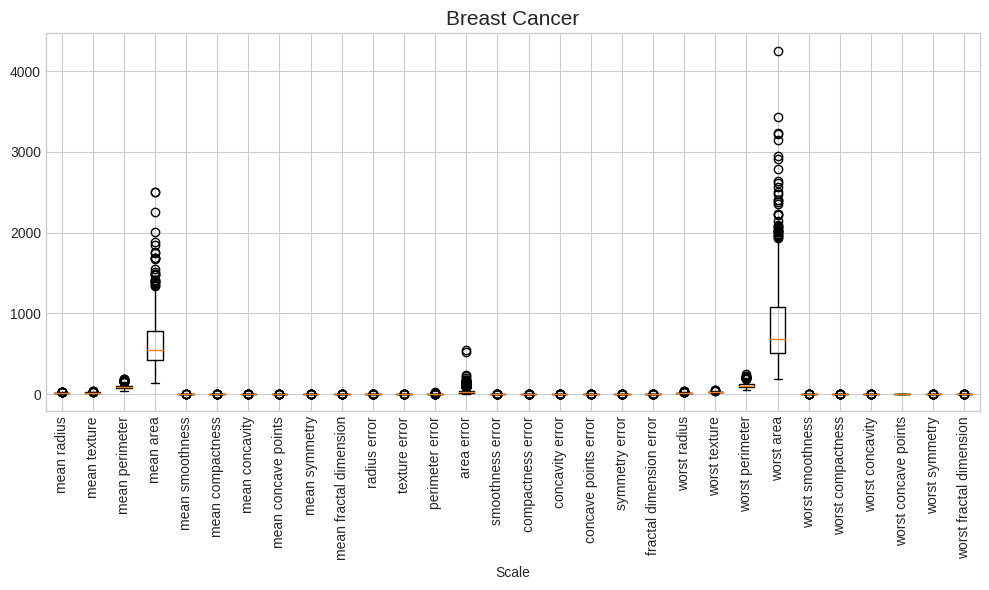

In [57]:
fig, plt.figure(figsize=[10, 6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90) # 수치형 변수 개수 넣음
plt.xlabel('Scale')
plt.tight_layout()

## 유방암 데이터에 대한 로지스틱 회귀 

In [62]:
cancer = load_breast_cancer()
x = cancer.data 
y = cancer.target

In [63]:
x.shape # 쉐잎 확인은 필수 

(569, 30)

In [64]:
y.shape

(569,)

In [ ]:
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y) #컴퓨터에 데이터셋이 있다면 더욱 빠른작업이 가능하다. 

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
# 데이터를 시험용으로 분류해주고 

In [68]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
print(f'Train Data Score : {model.score(x_train,y_train)}')
print(f'Test Data Score: {model.score(x_test,y_test)}')

Train Data Score : 0.9428571428571428
Test Data Score: 0.9736842105263158


In [70]:
scores = cross_val_score(model, x, y, cv= 10 , scoring = 'accuracy')
print(f'CV mean score : {scores.mean()}') #스코어의 정확도를 측정해본다 절대적이지 않음 

CV mean score : 0.938533834586466


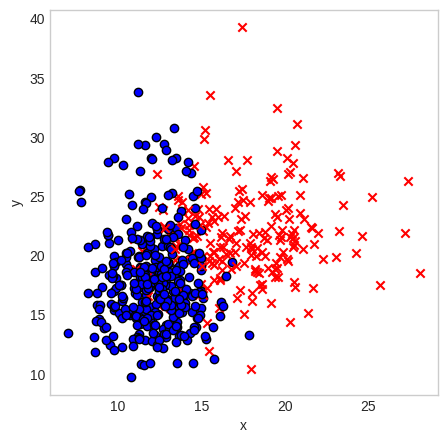

In [71]:
fig, ax = plt.subplots(1, 1 , figsize = (5,5))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(569):
  if y[i] == 0:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'x', color = 'r')
  else:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'o', color = 'b')
    
    # 그래프 표현 

# 확률적 경사 하강법 (Stochastic Gradient Descent)

- 모델을 학습 시키기 위한 간단한 방법
- 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h}
\end{equation}

\begin{equation}
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
#x, y = load_boston(return_X_y=True)
#x_train, x_test, y_train, y_test = train_test_split(x, y)
#model = make_pipeline(StandardScaler(), 
#                      SGDRegressor(loss='squared_loss')) # 선형 회귀에서는 squared_loss를 주로 사용
#model.fit(x_train, y_train)
#print(f'Train Data Score: {model.score(x_train, y_train)}')
#print(f'Test Data Score: {model.score(x_test, y_test)}')
# StandardScaler SGDRegressor 뺴고는 특별하지 않다. 

## 붓꽃 데이터에 대한 SGD 분류 

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [74]:
x,y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [75]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log')) #cross entropy = log 
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [76]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9821428571428571
Test Data Score: 0.9210526315789473


## 유방암 데이터에 대한 SGD 분류 

In [77]:
from sklearn.datasets import load_breast_cancer
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(x_train, y_train)
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9812206572769953
Test Data Score: 0.9440559440559441


In [ ]:
# 과정만 천천히 익혀가면 따라갈 수  있다. 